1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [22]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [95]:
# тренировочный набор
X_, y_, coef = datasets.make_regression(n_samples=10000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [50]:
# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4):
    out = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        out.append([i,err])
        if i % (iterations / 10) == 0:
            print(i, w, err)
            
    return w, err, np.array(out)

In [57]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, alpha=1e-4):
    out = []
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        out.append([i,err])
        if i % (iterations / 10) == 0:
            print(i, w, err)
            
    return w, err, np.array(out)

In [92]:
lr_GD, err_GD, lr_GD_out = eval_GD(X_, y_, 1000, alpha=1e-2)

100 [85.21677474  4.7531069 ] 208.94260587535814
200 [96.7708608   5.44628793] 28.003900339983264
300 [98.34662483  5.54412976] 24.637602707058896
400 [98.56153282  5.55789222] 24.57497295083162
500 [98.59084306  5.5598222 ] 24.573807711556157
600 [98.59484058  5.56009214] 24.573786031777928
700 [98.5953858  5.5601298] 24.57378562841206
800 [98.59546016  5.56013505] 24.573785620907113
900 [98.5954703   5.56013578] 24.573785620767485
1000 [98.59547168  5.56013588] 24.57378562076488


In [94]:
lr_SGD, err_SGD, lr_SGD_out = eval_SGD(X_, y_, 1000, alpha=1e-2)

100 [92.63972269  3.10153521] 67.02483896221433
200 [97.78243554  5.2070897 ] 25.316758327298764
300 [98.23914403  5.23795665] 24.84082809643939
400 [98.24152365  5.27631845] 24.77602772242678
500 [97.61008287  5.13323322] 25.949991317190744
600 [98.64265778  4.66763273] 25.312681609912104
700 [98.84602424  6.18020275] 25.08359123346521
800 [98.24216128  6.43037873] 25.390979338638008
900 [99.76115067  5.29541999] 26.22534387676491
1000 [99.09971622  5.57463741] 24.827465242076492


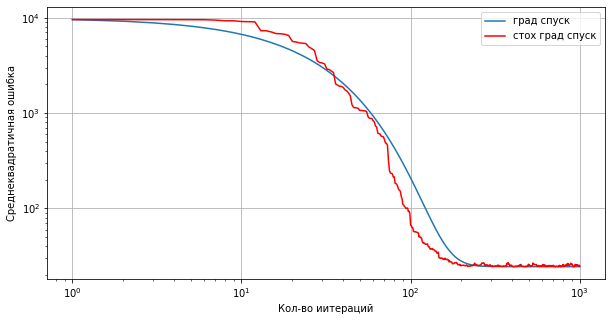

In [90]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.yscale('log')
plt.plot(lr_GD_out[:,0], lr_GD_out[:,1], label="град спуск")
plt.plot(lr_SGD_out[:,0], lr_SGD_out[:,1], "r", label="стох град спуск")
plt.xlabel('Кол-во иитераций')
plt.ylabel('Среднеквадратичная ошибка')
plt.grid()
plt.legend();

согласно графику стохастический метод дает в конечном итоге немного более быстрый результат, но делает это в рваном темпе (то в плюс то с минус). обычный градиентный спуск дает стабильно плавный результат, но несколько медленнее

2.[*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов (лучше графически).

In [97]:
# регуляризация L2
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [106]:
# регуляризация L1
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + (lambda_ * w) / np.abs(w))        
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [112]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_, y_, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y_, np.dot(X_, w_new)))
weights2 = np.array(w_list)
lamb2 = np.array(l_list)
errors2 = np.array(error_list)

In [113]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg1(X_, y_, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y_, np.dot(X_, w_new)))
weights1 = np.array(w_list)
lamb1 = np.array(l_list)
errors1 = np.array(error_list)

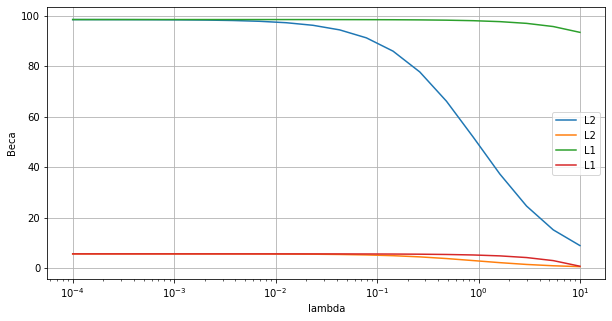

In [116]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
# plt.yscale('log')
plt.plot(lamb2, weights2, label="L2")
plt.plot(lamb1, weights1, label="L1")
plt.xlabel('lambda')
plt.ylabel('Веса')
plt.grid()
plt.legend();

In [114]:
errors2

array([  24.57388449,   24.57411773,   24.57490108,   24.5775312 ,
         24.58635698,   24.6159427 ,   24.71493286,   25.04500231,
         26.13868601,   29.72159063,   41.22164217,   76.8232955 ,
        180.40097061,  452.55723477, 1064.82427061, 2178.10410608,
       3747.13044781, 5450.63969626, 6922.84557976, 7993.08377256])

In [115]:
errors1

array([24.57378563, 24.57378564, 24.57378568, 24.57378581, 24.57378626,
       24.57378776, 24.57379281, 24.57380976, 24.57386674, 24.57405816,
       24.57470128, 24.57686206, 24.58412188, 24.60851351, 24.69046492,
       24.9658067 , 25.89090488, 28.99906641, 39.44192389, 74.5280265 ])

ПРи L2 веса уменьшаются стремительно, что приводит к огромной ошибке. При L1 веса меняются очень плавно и мягко, ошибка при этом растет не катастрофично.